In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import category_encoders as ce

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/H2GTRM.TTF'  # 폰트 파일 경로
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

In [92]:
df = pd.read_csv('D:/김동영/11_Github/mygit/LGaimers 6기/Data/train.csv')
test_df = pd.read_csv('D:/김동영/11_Github/mygit/LGaimers 6기/Data/test.csv')

In [93]:
pd.set_option('display.max_rows', None)

# 결측치 개수 확인
missing_values = df.isnull().sum()
print(missing_values)

test_missing_values = test_df.isnull().sum() 
print(test_missing_values)

# # 결측치는 전부 -1로 대체
# df.fillna(-1, inplace=True)
# test_df.fillna(-1, inplace=True)

ID                            0
시술 시기 코드                      0
시술 당시 나이                      0
임신 시도 또는 마지막 임신 경과 연수    246981
시술 유형                         0
특정 시술 유형                      2
배란 자극 여부                      0
배란 유도 유형                      0
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
남성 주 불임 원인                    0
남성 부 불임 원인                    0
여성 주 불임 원인                    0
여성 부 불임 원인                    0
부부 주 불임 원인                    0
부부 부 불임 원인                    0
불명확 불임 원인                     0
불임 원인 - 난관 질환                 0
불임 원인 - 남성 요인                 0
불임 원인 - 배란 장애                 0
불임 원인 - 여성 요인                 0
불임 원인 - 자궁경부 문제               0
불임 원인 - 자궁내막증                 0
불임 원인 - 정자 농도                 0
불임 원인 - 정자 면역학적 요인            0
불임 원인 - 정자 운동성                0
불임 원인 - 정자 형태                 0
배아 생성 주요 이유                6291
총 시술 횟수                       0
클리닉 내 총 시술 횟수                 0
IVF 시술 횟

In [94]:
print(df.columns)

Index(['ID', '시술 시기 코드', '시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '시술 유형',
       '특정 시술 유형', '배란 자극 여부', '배란 유도 유형', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부',
       '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인',
       '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환',
       '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제',
       '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
       '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '배아 생성 주요 이유', '총 시술 횟수',
       '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수',
       'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '총 생성 배아 수',
       '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수',
       '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수',
       '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처',
       '난자 기증자 나이', '정자 기증자 나이', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부',
       '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부

In [95]:
def value_counts_ratio(df, col_name, target_name='임신 성공 여부'):
    """
    주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 비율과 갯수, 총 갯수를 출력하는 함수.

    Parameters:
    df (pd.DataFrame): 데이터프레임
    col_name (str): 열 이름
    target_name (str): 타겟 변수 이름
    """
    # 각 값마다 타겟 변수의 비율 계산
    value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
    
    # 각 값마다 타겟 변수의 갯수 계산
    counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)
    
    # 각 값마다 총 갯수 계산
    total_counts = df[col_name].value_counts().rename('Total_Count')
    
    # 비율과 갯수를 합침
    result = value_counts.join(counts, lsuffix='_ratio', rsuffix='_count')
    
    # 총 갯수를 합침
    result = result.join(total_counts, on=col_name)
    
    # 출력 형식 조정
    result.index.name = 'variable'
    print(f"\n{col_name}별 {target_name} 비율 및 갯수\n")
    print(result.rename(columns=lambda x: x.split('_')[0]))
    
    
def summarize_grouped_data(df, group_by_columns):
    # 데이터프레임을 그룹화
    grouped_df = df.groupby(group_by_columns)
    
    # 결과를 저장할 리스트 초기화
    results = []
    
    # 그룹화된 데이터프레임의 내용을 확인하는 코드
    for name, group in grouped_df:
        # 그룹의 갯수 계산
        group_count = group.shape[0]
        
        # '임신 성공 여부' 변수의 '임신 실패' 비율과 갯수 계산
        adnormal_count = group['임신 성공 여부'].value_counts().get(0, 0)
        adnormal_ratio = adnormal_count / group_count
        
        # 결과 리스트에 추가
        results.append([name, adnormal_count, adnormal_ratio, group_count])
    
    # 결과 리스트를 데이터프레임으로 변환
    results_df = pd.DataFrame(results, columns=['group', "'임신 실패' count", 'ratio', 'Total'])
    
    # 그룹화된 변수들의 이름을 제목행으로 출력
    print(f"Grouped by: {', '.join(group_by_columns)}")
    print()
    # 데이터프레임 출력
    print(results_df)
    
    return results_df

1.PGD 시술 여부, PGS 시술 여부    
결측치가 존재 --> 0으로 채워넣어 준다.    

In [96]:
# 결측치 전부 0으로 대체
df['PGD 시술 여부'] = df['PGD 시술 여부'].fillna(0)
df['PGS 시술 여부'] = df['PGS 시술 여부'].fillna(0)

test_df['PGD 시술 여부'] = test_df['PGD 시술 여부'].fillna(0)
test_df['PGS 시술 여부'] = test_df['PGS 시술 여부'].fillna(0)

In [97]:
df['PGD 시술 여부'].value_counts()

PGD 시술 여부
0.0    254172
1.0      2179
Name: count, dtype: int64

In [98]:
summarize_grouped_data(df, ['PGD 시술 여부', 'PGS 시술 여부'])

Grouped by: PGD 시술 여부, PGS 시술 여부

        group  '임신 실패' count     ratio   Total
0  (0.0, 0.0)         187022  0.741436  252243
1  (0.0, 1.0)           1531  0.793675    1929
2  (1.0, 0.0)           1570  0.720514    2179


,group,'임신 실패' count,ratio,Total
0,"(0.0, 0.0)",187022,0.741436,252243
1,"(0.0, 1.0)",1531,0.793675,1929
2,"(1.0, 0.0)",1570,0.720514,2179


PGD 시술만 했을 경우 1, PGS 시술만 했을 경우 -1, 둘 다 안했을때 0   

In [99]:
# 새로운 변수 생성
df['시술 여부'] = df.apply(lambda row: 1 if row['PGD 시술 여부'] == 1 else (-1 if row['PGS 시술 여부'] == 1 else 0), axis=1)

test_df['시술 여부'] = test_df.apply(lambda row: 1 if row['PGD 시술 여부'] == 1 else (-1 if row['PGS 시술 여부'] == 1 else 0), axis=1)

In [100]:
df['시술 여부'].value_counts()
test_df['시술 여부'].value_counts()

시술 여부
 0    88615
 1      781
-1      671
Name: count, dtype: int64

In [101]:
df = df.drop(['PGD 시술 여부', 'PGS 시술 여부'], axis=1)
test_df = test_df.drop(['PGD 시술 여부', 'PGS 시술 여부'], axis=1)

2. 시술 시기 코드, 시술 당시 나이   
시술 시기 코드를 기준으로는 큰 차이가 존재하지 않았다.--> 시술 시기 코드 변수는 drop    
시술 당시 나이를 기준으로는 나이가 많아질수록 임신 실패 확률이 높아졌다.--> 시술 당시 나이는 그대로 살린다    

In [102]:
# 시술 시기 코드 변수를 drop
df = df.drop(['시술 시기 코드'], axis=1)
test_df = test_df.drop(['시술 시기 코드'], axis=1)

3. 임신 시도 또는 마지막 임신 경과 연수

In [103]:
df['임신 시도 또는 마지막 임신 경과 연수'].isna().sum()

df['임신 시도 또는 마지막 임신 경과 연수'].value_counts(ascending=False)

summarize_grouped_data(df, ['임신 시도 또는 마지막 임신 경과 연수'])

Grouped by: 임신 시도 또는 마지막 임신 경과 연수

      group  '임신 실패' count     ratio  Total
0    (0.0,)              8  0.666667     12
1    (1.0,)              4  0.666667      6
2    (2.0,)             17  0.809524     21
3    (3.0,)             67  0.752809     89
4    (4.0,)            231  0.757377    305
5    (5.0,)            522  0.754335    692
6    (6.0,)            744  0.750757    991
7    (7.0,)            928  0.764415   1214
8    (8.0,)            923  0.784864   1176
9    (9.0,)            814  0.795699   1023
10  (10.0,)            737  0.778247    947
11  (11.0,)            568  0.810271    701
12  (12.0,)            398  0.780392    510
13  (13.0,)            403  0.837838    481
14  (14.0,)            257  0.776435    331
15  (15.0,)            201  0.791339    254
16  (16.0,)            171  0.846535    202
17  (17.0,)            115  0.821429    140
18  (18.0,)             89  0.839623    106
19  (19.0,)             73  0.848837     86
20  (20.0,)             69  0.831325     

,group,'임신 실패' count,ratio,Total
0,"(0.0,)",8,0.666667,12
1,"(1.0,)",4,0.666667,6
2,"(2.0,)",17,0.809524,21
3,"(3.0,)",67,0.752809,89
4,"(4.0,)",231,0.757377,305
5,"(5.0,)",522,0.754335,692
6,"(6.0,)",744,0.750757,991
7,"(7.0,)",928,0.764415,1214
8,"(8.0,)",923,0.784864,1176
9,"(9.0,)",814,0.795699,1023


In [104]:
df['임신 시도 또는 마지막 임신 경과 연수'] = df['임신 시도 또는 마지막 임신 경과 연수'].fillna(-1)
test_df['임신 시도 또는 마지막 임신 경과 연수'] = test_df['임신 시도 또는 마지막 임신 경과 연수'].fillna(-1)

test_df['임신 시도 또는 마지막 임신 경과 연수'].value_counts()

임신 시도 또는 마지막 임신 경과 연수
-1.0     86770
 7.0       405
 8.0       403
 6.0       352
 9.0       320
 10.0      311
 5.0       286
 11.0      253
 12.0      205
 13.0      168
 14.0      127
 4.0       106
 15.0       92
 16.0       64
 17.0       64
 18.0       44
 20.0       33
 19.0       29
 3.0        23
 2.0         5
 0.0         4
 1.0         3
Name: count, dtype: int64

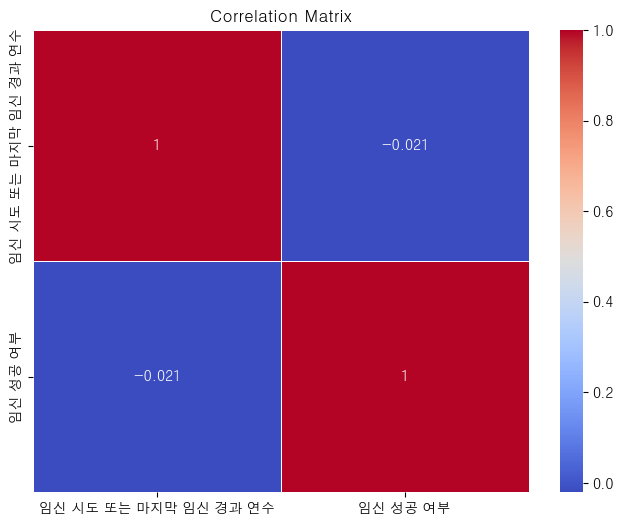

In [143]:
# 상관계수 계산
correlation_matrix = df[['임신 시도 또는 마지막 임신 경과 연수', '임신 성공 여부']].corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

4. 시술 유형   

In [105]:
summarize_grouped_data(df, ['시술 유형'])

# Target Encoding을 사용하여 '시술 유형' 변수를 수치형 변수로 변환
encoder = ce.TargetEncoder(cols=['시술 유형'])
df['시술 유형'] = encoder.fit_transform(df['시술 유형'], df['임신 성공 여부'])

Grouped by: 시술 유형

    group  '임신 실패' count     ratio   Total
0   (DI,)           5480  0.871086    6291
1  (IVF,)         184643  0.738395  250060


In [106]:
summarize_grouped_data(df, ['시술 유형'])

# df['시술 유형'].unique()
test_df['시술 유형'].value_counts()

# df['시술 유형'].unique()

Grouped by: 시술 유형

                    group  '임신 실패' count     ratio   Total
0  (0.12891432204736925,)           5480  0.871086    6291
1   (0.2616052147484604,)         184643  0.738395  250060


시술 유형
IVF    87891
DI      2176
Name: count, dtype: int64

In [107]:
# 학습된 인코더를 사용하여 테스트 데이터프레임에 동일한 인코딩 적용
test_df['시술 유형'] = encoder.transform(test_df['시술 유형'])

test_df['시술 유형'].value_counts()

시술 유형
0.261605    87891
0.128914     2176
Name: count, dtype: int64

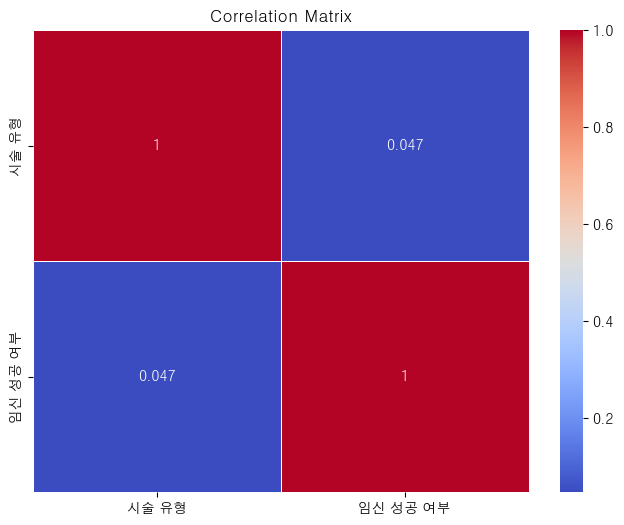

In [150]:
# 상관계수 계산
correlation_matrix = df[['시술 유형', '임신 성공 여부']].corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

5. 특정 시술 유형     
범주형 변수 --> 수치형 변환   
수치형 변환으로 Target Encoding 적용, Target Encoding 적용시 해당 범주 개수가 적을 경우 값이 극단적으로 치우칠 수 있기 때문에 Smoothing 방식을 적용시킨다.    

In [108]:
summarize_grouped_data(df, ['특정 시술 유형'])

df['특정 시술 유형'] = df['특정 시술 유형'].replace('ICSI / BLASTOCYST :IVF / BLASTOCYST', 'ICSI / BLASTOCYST:IVF / BLASTOCYST')
test_df['특정 시술 유형'] = test_df['특정 시술 유형'].replace('ICSI / BLASTOCYST :IVF / BLASTOCYST', 'ICSI / BLASTOCYST:IVF / BLASTOCYST')

test_df['특정 시술 유형'] = test_df['특정 시술 유형'].replace('IVF:Unknown:Unknown:Unknown', 'IVF:Unknown')

df['특정 시술 유형'].unique()

df['특정 시술 유형'].isna().sum()
# 결측치 Unknown으로 대체
df['특정 시술 유형'] = df['특정 시술 유형'].fillna('Unknown')
test_df['특정 시술 유형'] = test_df['특정 시술 유형'].fillna('Unknown')

Grouped by: 특정 시술 유형

                                     group  '임신 실패' count     ratio   Total
0                                   (FER,)              2  0.666667       3
1                                  (GIFT,)              2  1.000000       2
2                            (Generic DI,)             59  0.830986      71
3                                   (ICI,)             83  0.864583      96
4                                  (ICSI,)          88983  0.727175  122368
5                             (ICSI / AH,)            602  0.782835     769
6                     (ICSI / AH:Unknown,)              1  0.500000       2
7                    (ICSI / BLASTOCYST ,)           1035  0.643257    1609
8               (ICSI / BLASTOCYST :ICSI,)              0  0.000000       1
9   (ICSI / BLASTOCYST :IVF / BLASTOCYST,)              3  0.750000       4
10   (ICSI / BLASTOCYST:IVF / BLASTOCYST,)              4  0.666667       6
11                            (ICSI:ICSI,)           2291  0.99006

In [109]:
print(df['특정 시술 유형'].unique())
print(test_df['특정 시술 유형'].unique())

print(df['특정 시술 유형'].value_counts())
print(test_df['특정 시술 유형'].value_counts())

['ICSI' 'IVF' 'Unknown' 'IUI' 'IVF:IVF' 'IVF / BLASTOCYST' 'ICSI:IVF'
 'ICSI / AH' 'ICSI:ICSI' 'IVF:ICSI' 'ICSI / BLASTOCYST ' 'IVF:Unknown'
 'ICSI:Unknown' 'IVF / AH' 'IVI' 'Generic DI'
 'ICSI / BLASTOCYST:IVF / BLASTOCYST' 'ICI' 'IVF / AH:ICSI / AH' 'GIFT'
 'ICSI / AH:Unknown' 'FER' 'ICSI / BLASTOCYST :ICSI']
['IVF' 'ICSI' 'Unknown' 'IUI' 'ICSI / BLASTOCYST ' 'IVF:ICSI' 'ICSI:ICSI'
 'IVF / BLASTOCYST' 'ICSI / AH' 'ICSI:IVF' 'Generic DI' 'IVF:IVF'
 'IVF:Unknown' 'IVF / AH' 'ICSI:Unknown' 'IVI' 'ICI'
 'ICSI / BLASTOCYST:IVF / BLASTOCYST' 'IUI:ICI']
특정 시술 유형
ICSI                                  122368
IVF                                    91755
Unknown                                26941
IUI                                     6100
ICSI:ICSI                               2314
ICSI / BLASTOCYST                       1609
IVF / BLASTOCYST                        1248
IVF:IVF                                 1146
ICSI:IVF                                 873
ICSI / AH                      

In [110]:
# Target Encoding을 사용하여 '시술 유형' 변수를 수치형 변수로 변환
encoder = ce.TargetEncoder(cols=['특정 시술 유형'])
df['특정 시술 유형'] = encoder.fit_transform(df['특정 시술 유형'], df['임신 성공 여부'])

In [111]:
# 학습된 인코더를 사용하여 테스트 데이터프레임에 동일한 인코딩 적용
test_df['특정 시술 유형'] = encoder.transform(test_df['특정 시술 유형'])

print(df['특정 시술 유형'].value_counts())
print(test_df['특정 시술 유형'].value_counts())

특정 시술 유형
0.272825    122368
0.261457     91755
0.237185     26941
0.128525      6100
0.009939      2314
0.356743      1609
0.366186      1248
0.010471      1146
0.234822       873
0.217165       769
0.283163       392
0.184953       319
0.101449       207
0.170030       100
0.135478        96
0.169555        71
0.159894        23
0.269551        10
0.221702         4
0.269931         3
0.292627         2
0.354844         1
Name: count, dtype: int64
특정 시술 유형
0.272825    43237
0.261457    32350
0.237185     9216
0.128525     2112
0.009939      797
0.356743      584
0.010471      406
0.366186      389
0.234822      298
0.217165      264
0.283163      133
0.184953      105
0.101449       68
0.170030       42
0.135478       28
0.169555       26
0.159894        8
0.269551        2
0.258349        2
Name: count, dtype: int64


In [112]:
df['특정 시술 유형'].unique()

array([0.27282459, 0.26145714, 0.23718496, 0.12852459, 0.0104712 ,
       0.3661859 , 0.23482245, 0.21716515, 0.0099395 , 0.28316327,
       0.35674332, 0.17002963, 0.10144928, 0.18495298, 0.15989383,
       0.16955544, 0.26955061, 0.13547816, 0.22170184, 0.29262737,
       0.26993139, 0.354844  ])

6. 배란 자극 여부   
결측치는 존재하지 않았음    

In [118]:
df['배란 자극 여부'].isna().sum()
test_df['배란 자극 여부'].isna().sum()

summarize_grouped_data(df, ['배란 자극 여부'])

Grouped by: 배란 자극 여부

  group  '임신 실패' count     ratio   Total
0  (0,)          45049  0.768348   58631
1  (1,)         145074  0.733735  197720


,group,'임신 실패' count,ratio,Total
0,"(0,)",45049,0.768348,58631
1,"(1,)",145074,0.733735,197720


7. 배란 유도 유형   
결측치 존재하지 않았음    
기록되지 않은 시행, 알 수 없음이 대부분을 차지하며 이 정보로는 임신 실패 유무를 확인하기 어렵기 때문에 필요없는 변수    

In [122]:
df['배란 유도 유형'].isna().sum()
test_df['배란 유도 유형'].isna().sum()  

0

In [124]:
summarize_grouped_data(df, ['배란 유도 유형'])

Grouped by: 배란 유도 유형

             group  '임신 실패' count     ratio   Total
0    (기록되지 않은 시행,)         142245  0.731593  194432
1    (생식선 자극 호르몬,)              0  0.000000       1
2  (세트로타이드 (억제제),)              1  1.000000       1
3        (알 수 없음,)          47877  0.773245   61917


,group,'임신 실패' count,ratio,Total
0,"(기록되지 않은 시행,)",142245,0.731593,194432
1,"(생식선 자극 호르몬,)",0,0.000000,1
2,"(세트로타이드 (억제제),)",1,1.000000,1
3,"(알 수 없음,)",47877,0.773245,61917


8. 단일 배아 이식 여부    
결측치가 존재 했음 --> -1로 대체    
단일 배아 이식을 했을 때는 임신 실패확률이 63%로 하지 않았을 때 77%로 더 낮은 것을 알 수 있었다. --> 쓸모있는 변수    

In [128]:
df['단일 배아 이식 여부'] = df['단일 배아 이식 여부'].fillna(-1)
test_df['단일 배아 이식 여부'] = test_df['단일 배아 이식 여부'].fillna(-1)

summarize_grouped_data(df, ['단일 배아 이식 여부'])

Grouped by: 단일 배아 이식 여부

     group  '임신 실패' count     ratio   Total
0  (-1.0,)           5480  0.871086    6291
1   (0.0,)         147700  0.770567  191677
2   (1.0,)          36943  0.632770   58383


,group,'임신 실패' count,ratio,Total
0,"(-1.0,)",5480,0.871086,6291
1,"(0.0,)",147700,0.770567,191677
2,"(1.0,)",36943,0.632770,58383


In [129]:
print(df['단일 배아 이식 여부'].value_counts())
print(test_df['단일 배아 이식 여부'].value_counts())

print(df['단일 배아 이식 여부'].isna().sum())
print(test_df['단일 배아 이식 여부'].isna().sum())

단일 배아 이식 여부
 0.0    191677
 1.0     58383
-1.0      6291
Name: count, dtype: int64
단일 배아 이식 여부
 0.0    67431
 1.0    20460
-1.0     2176
Name: count, dtype: int64
0
0


8. 착상 전 유전 검사 사용 여부, 착상 전 유전 진단 사용 여부   
착상 전 유전 검사(PSG)가 시행된 경우 임신 실패할 확률은 85%인 반면 확인되지 못한 경우는 74%였다.   
착상 전 유전 진단(PSD)이 시행된 경우 임신 실패 확률은 80%로 시행되지 않은 경우는 73%이다.    

PGS, PSD 시술 여부와의 관계를 상관계수로 본 결과 착상 전 유전 검사 사용 여부와는 -0.58, 착상 전 유전 진단 사용 여부와는 0.35를 기록했다.    

In [133]:
print(df['착상 전 유전 검사 사용 여부'].isna().sum())
print(df['착상 전 유전 진단 사용 여부'].isna().sum())

print(test_df['착상 전 유전 검사 사용 여부'].isna().sum())
print(test_df['착상 전 유전 진단 사용 여부'].isna().sum())

# 결측치 -1로 대체
df['착상 전 유전 검사 사용 여부'] = df['착상 전 유전 검사 사용 여부'].fillna(-1)
df['착상 전 유전 진단 사용 여부'] = df['착상 전 유전 진단 사용 여부'].fillna(-1)

test_df['착상 전 유전 검사 사용 여부'] = test_df['착상 전 유전 검사 사용 여부'].fillna(-1)
test_df['착상 전 유전 진단 사용 여부'] = test_df['착상 전 유전 진단 사용 여부'].fillna(-1)

253633
6291
89134
2176


In [136]:
summarize_grouped_data(df, ['착상 전 유전 검사 사용 여부'])
summarize_grouped_data(df, ['착상 전 유전 진단 사용 여부'])

Grouped by: 착상 전 유전 검사 사용 여부

     group  '임신 실패' count     ratio   Total
0  (-1.0,)         187808  0.740471  253633
1   (1.0,)           2315  0.851729    2718
Grouped by: 착상 전 유전 진단 사용 여부

     group  '임신 실패' count     ratio   Total
0  (-1.0,)           5480  0.871086    6291
1   (0.0,)         182061  0.737495  246864
2   (1.0,)           2582  0.807885    3196


,group,'임신 실패' count,ratio,Total
0,"(-1.0,)",5480,0.871086,6291
1,"(0.0,)",182061,0.737495,246864
2,"(1.0,)",2582,0.807885,3196


PGD 시술만 했을 경우 1, PGS 시술만 했을 경우 -1, 둘 다 안했을때 0   

Grouped by: 착상 전 유전 검사 사용 여부, 착상 전 유전 진단 사용 여부

          group  '임신 실패' count     ratio   Total
0  (-1.0, -1.0)           5480  0.871086    6291
1   (-1.0, 0.0)         179770  0.736243  244172
2   (-1.0, 1.0)           2558  0.806940    3170
3    (1.0, 0.0)           2291  0.851040    2692
4    (1.0, 1.0)             24  0.923077      26
Grouped by: 착상 전 유전 검사 사용 여부, 착상 전 유전 진단 사용 여부, 시술 여부

             group  '임신 실패' count     ratio   Total
0  (-1.0, -1.0, 0)           5480  0.871086    6291
1   (-1.0, 0.0, 0)         179770  0.736243  244172
2   (-1.0, 1.0, 0)            988  0.996973     991
3   (-1.0, 1.0, 1)           1570  0.720514    2179
4   (1.0, 0.0, -1)           1531  0.793675    1929
5    (1.0, 0.0, 0)            760  0.996068     763
6    (1.0, 1.0, 0)             24  0.923077      26


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HYGothic-Medium.
  fig.canvas.draw()
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HYGothic-Medium.
  fig.canvas.print_figure(bytes_io, **kw)


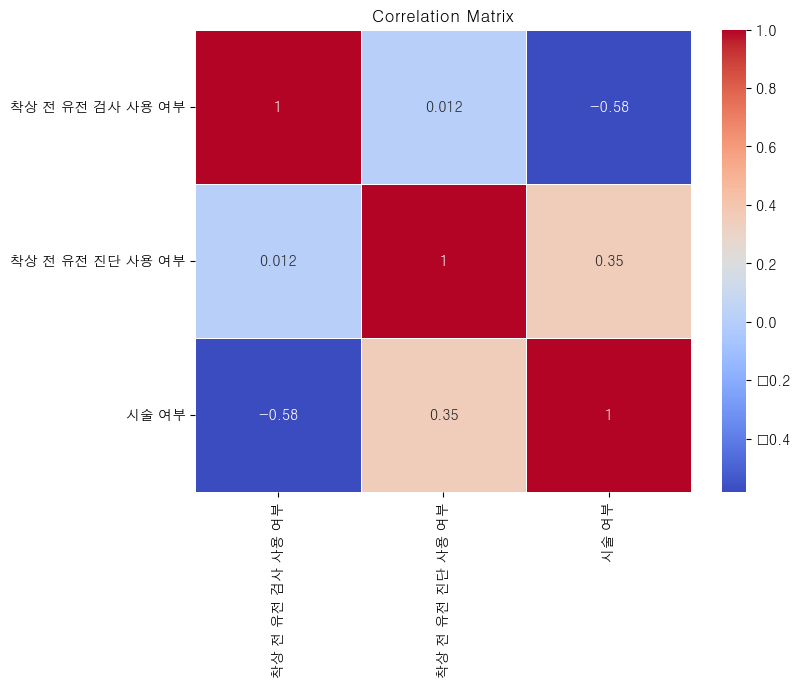

In [140]:
summarize_grouped_data(df, ['착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부'])

summarize_grouped_data(df, ['착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부',  '시술 여부'])

# 상관계수 계산
correlation_matrix = df[['착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부', '시술 여부']].corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HYGothic-Medium.
  fig.canvas.draw()
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HYGothic-Medium.
  fig.canvas.print_figure(bytes_io, **kw)


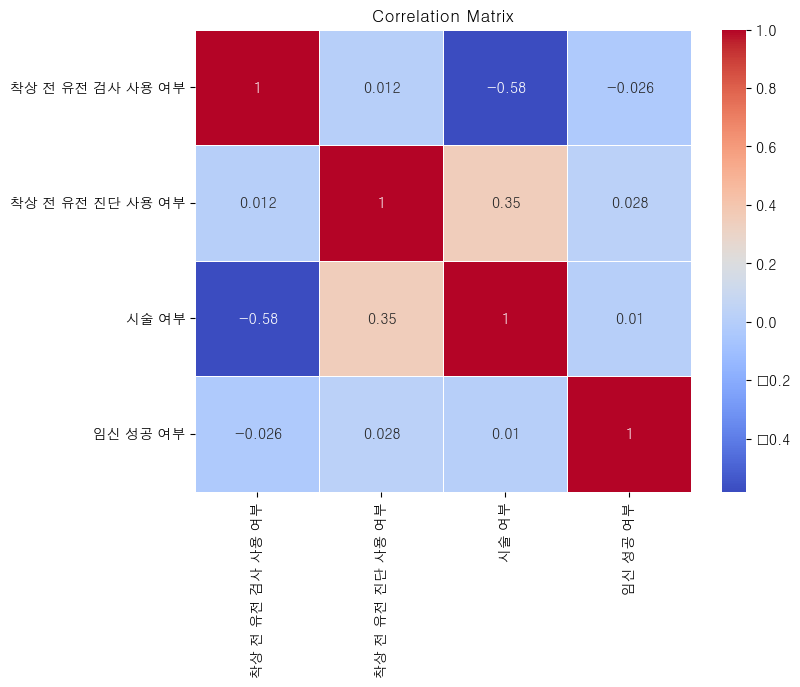

In [141]:
# 상관계수 계산
correlation_matrix = df[['착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부', '시술 여부', '임신 성공 여부']].corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

8. 불임 원인    
불임 원인이 반드시 있다고 해서 시술이 실패한다고 할 수 없다.      

In [144]:
# 남성 불임 원인 변수 간 상관계수 계산

summarize_grouped_data(df, ['남성 주 불임 원인', '남성 부 불임 원인', '불임 원인 - 남성 요인', 
                            '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
                            '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태'])

Grouped by: 남성 주 불임 원인, 남성 부 불임 원인, 불임 원인 - 남성 요인, 불임 원인 - 정자 농도, 불임 원인 - 정자 면역학적 요인, 불임 원인 - 정자 운동성, 불임 원인 - 정자 형태

                    group  '임신 실패' count     ratio   Total
0   (0, 0, 0, 0, 0, 0, 0)         116924  0.752891  155300
1   (0, 0, 1, 0, 0, 0, 0)          64794  0.716986   90370
2   (0, 0, 1, 0, 0, 0, 1)              0  0.000000       1
3   (0, 0, 1, 0, 0, 1, 0)              1  1.000000       1
4   (0, 0, 1, 1, 0, 0, 0)              7  0.700000      10
5   (0, 1, 0, 0, 0, 0, 0)           1636  0.812314    2014
6   (0, 1, 1, 0, 0, 0, 0)            960  0.784314    1224
7   (0, 1, 1, 0, 0, 0, 1)             34  0.772727      44
8   (0, 1, 1, 0, 0, 1, 0)              7  0.636364      11
9   (0, 1, 1, 0, 0, 1, 1)              4  0.800000       5
10  (0, 1, 1, 1, 0, 0, 0)             40  0.851064      47
11  (0, 1, 1, 1, 0, 0, 1)              2  1.000000       2
12  (0, 1, 1, 1, 0, 1, 1)             12  1.000000      12
13  (1, 0, 0, 0, 0, 0, 0)           2816  0.788796    357

,group,'임신 실패' count,ratio,Total
0,"(0, 0, 0, 0, 0, 0, 0)",116924,0.752891,155300
1,"(0, 0, 1, 0, 0, 0, 0)",64794,0.716986,90370
2,"(0, 0, 1, 0, 0, 0, 1)",0,0.000000,1
3,"(0, 0, 1, 0, 0, 1, 0)",1,1.000000,1
4,"(0, 0, 1, 1, 0, 0, 0)",7,0.700000,10
5,"(0, 1, 0, 0, 0, 0, 0)",1636,0.812314,2014
6,"(0, 1, 1, 0, 0, 0, 0)",960,0.784314,1224
7,"(0, 1, 1, 0, 0, 0, 1)",34,0.772727,44
8,"(0, 1, 1, 0, 0, 1, 0)",7,0.636364,11
9,"(0, 1, 1, 0, 0, 1, 1)",4,0.800000,5


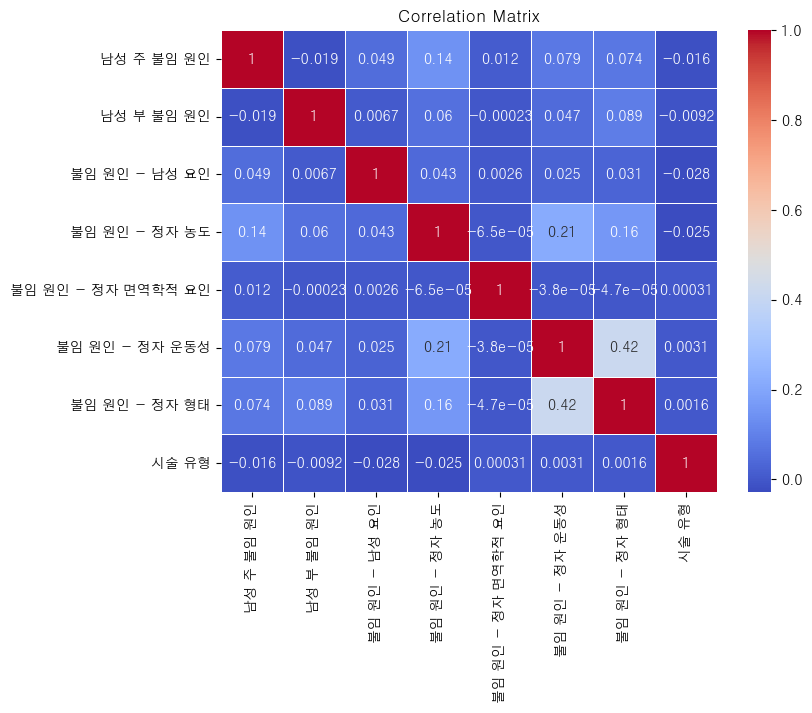

In [147]:
# 상관계수 계산
correlation_matrix = df[['남성 주 불임 원인', '남성 부 불임 원인', '불임 원인 - 남성 요인', 
                            '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
                            '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '시술 유형']].corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [148]:
# 여성 불임 원인 변수 간 상관계수 계산

summarize_grouped_data(df, ['여성 주 불임 원인', '여성 부 불임 원인', '불임 원인 - 여성 요인', 
                            '불임 원인 - 배란 장애', '불임 원인 - 자궁경부 문제',
                            '불임 원인 - 자궁내막증', '불임 원인 - 난관 질환'])

Grouped by: 여성 주 불임 원인, 여성 부 불임 원인, 불임 원인 - 여성 요인, 불임 원인 - 배란 장애, 불임 원인 - 자궁경부 문제, 불임 원인 - 자궁내막증, 불임 원인 - 난관 질환

                    group  '임신 실패' count     ratio   Total
0   (0, 0, 0, 0, 0, 0, 0)         126506  0.744258  169976
1   (0, 0, 0, 0, 0, 0, 1)          20106  0.740280   27160
2   (0, 0, 0, 0, 0, 1, 0)           9649  0.743088   12985
3   (0, 0, 0, 0, 0, 1, 1)           2440  0.757294    3222
4   (0, 0, 0, 1, 0, 0, 0)          19600  0.710737   27577
5   (0, 0, 0, 1, 0, 0, 1)           1936  0.708379    2733
6   (0, 0, 0, 1, 0, 1, 0)            958  0.711738    1346
7   (0, 0, 0, 1, 0, 1, 1)            220  0.743243     296
8   (0, 1, 0, 0, 0, 0, 0)           1419  0.811785    1748
9   (0, 1, 0, 0, 0, 0, 1)            753  0.790966     952
10  (0, 1, 0, 0, 0, 1, 0)             53  0.854839      62
11  (0, 1, 0, 0, 0, 1, 1)             13  0.650000      20
12  (0, 1, 0, 0, 1, 0, 0)              2  1.000000       2
13  (0, 1, 0, 1, 0, 0, 0)            253  0.808307     313
14

,group,'임신 실패' count,ratio,Total
0,"(0, 0, 0, 0, 0, 0, 0)",126506,0.744258,169976
1,"(0, 0, 0, 0, 0, 0, 1)",20106,0.740280,27160
2,"(0, 0, 0, 0, 0, 1, 0)",9649,0.743088,12985
3,"(0, 0, 0, 0, 0, 1, 1)",2440,0.757294,3222
4,"(0, 0, 0, 1, 0, 0, 0)",19600,0.710737,27577
5,"(0, 0, 0, 1, 0, 0, 1)",1936,0.708379,2733
6,"(0, 0, 0, 1, 0, 1, 0)",958,0.711738,1346
7,"(0, 0, 0, 1, 0, 1, 1)",220,0.743243,296
8,"(0, 1, 0, 0, 0, 0, 0)",1419,0.811785,1748
9,"(0, 1, 0, 0, 0, 0, 1)",753,0.790966,952


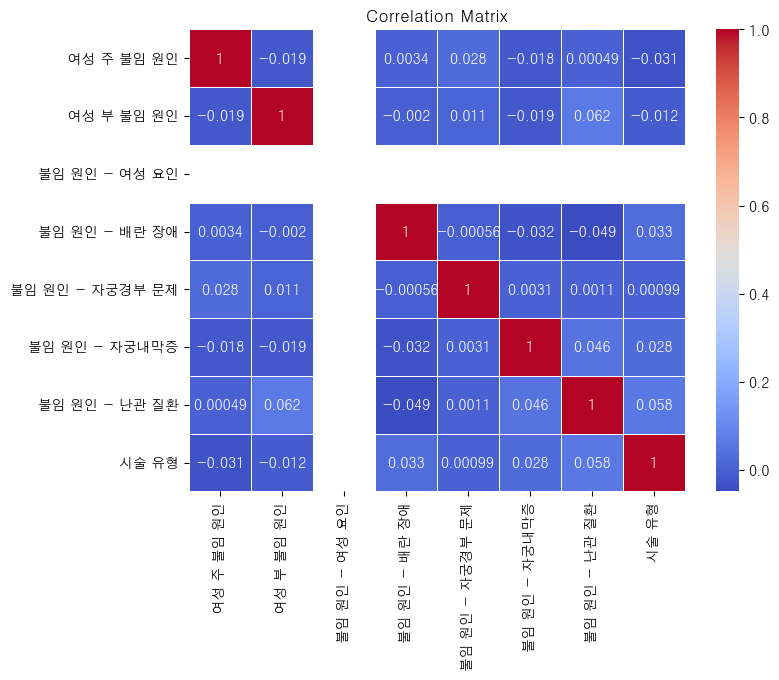

In [149]:
# 상관계수 계산
correlation_matrix = df[['여성 주 불임 원인', '여성 부 불임 원인', '불임 원인 - 여성 요인', 
                            '불임 원인 - 배란 장애', '불임 원인 - 자궁경부 문제',
                            '불임 원인 - 자궁내막증', '불임 원인 - 난관 질환', '시술 유형']].corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

9. 배아 생성 주요 이유    
결측치 존재 --> -1로 대체   
범주형 변수이므로 Target Encoding을 활용해 수치형으로 변환    

In [153]:
df['배아 생성 주요 이유'].isna().sum()
test_df['배아 생성 주요 이유'].isna().sum()  

# 결측치 -1로 대체
df['배아 생성 주요 이유'] = df['배아 생성 주요 이유'].fillna(-1)
test_df['배아 생성 주요 이유'] = test_df['배아 생성 주요 이유'].fillna(-1)

In [154]:
summarize_grouped_data(df, ['배아 생성 주요 이유'])

Grouped by: 배아 생성 주요 이유

                     group  '임신 실패' count     ratio   Total
0                    (-1,)           5480  0.871086    6291
1                   (기증용,)           1108  1.000000    1108
2           (기증용, 난자 저장용,)             44  1.000000      44
3           (기증용, 배아 저장용,)            125  1.000000     125
4   (기증용, 배아 저장용, 현재 시술용,)             13  0.650000      20
5           (기증용, 현재 시술용,)           2347  0.620243    3784
6                (난자 저장용,)           1959  1.000000    1959
7        (난자 저장용, 배아 저장용,)              6  1.000000       6
8   (난자 저장용, 배아 저장용, 연구용,)              1  1.000000       1
9        (난자 저장용, 현재 시술용,)              4  0.800000       5
10               (배아 저장용,)           9184  0.999130    9192
11       (배아 저장용, 현재 시술용,)             61  0.734940      83
12          (연구용, 현재 시술용,)              1  1.000000       1
13               (현재 시술용,)         169790  0.726430  233732


,group,'임신 실패' count,ratio,Total
0,"(-1,)",5480,0.871086,6291
1,"(기증용,)",1108,1.000000,1108
2,"(기증용, 난자 저장용,)",44,1.000000,44
3,"(기증용, 배아 저장용,)",125,1.000000,125
4,"(기증용, 배아 저장용, 현재 시술용,)",13,0.650000,20
5,"(기증용, 현재 시술용,)",2347,0.620243,3784
6,"(난자 저장용,)",1959,1.000000,1959
7,"(난자 저장용, 배아 저장용,)",6,1.000000,6
8,"(난자 저장용, 배아 저장용, 연구용,)",1,1.000000,1
9,"(난자 저장용, 현재 시술용,)",4,0.800000,5


In [155]:
# Target Encoding을 사용하여 '시술 유형' 변수를 수치형 변수로 변환
encoder = ce.TargetEncoder(cols=['배아 생성 주요 이유'])
df['배아 생성 주요 이유'] = encoder.fit_transform(df['배아 생성 주요 이유'], df['임신 성공 여부'])

In [156]:
# 학습된 인코더를 사용하여 테스트 데이터프레임에 동일한 인코딩 적용
test_df['배아 생성 주요 이유'] = encoder.transform(test_df['배아 생성 주요 이유'])

print(df['배아 생성 주요 이유'].value_counts())
print(test_df['배아 생성 주요 이유'].value_counts())

배아 생성 주요 이유
0.273570    233732
0.000870      9192
0.128914      6291
0.379757      3784
0.000000      3067
0.000007       125
0.265048        83
0.021488        44
0.304174        20
0.207243         6
0.247705         5
0.224736         2
Name: count, dtype: int64
배아 생성 주요 이유
0.273570    82253
0.000870     3151
0.128914     2176
0.379757     1327
0.000000     1048
0.000007       47
0.265048       38
0.021488       19
0.304174        6
0.247705        1
0.207243        1
Name: count, dtype: int64


10. 시술 횟수   
총 시술 횟수 = IVF 시술 횟수 + DI 시술 횟수   
총 임신 횟수 = IVF 임신 횟수 + DI 임신 횟수   
총 출산 횟수 = IVF 출산 횟수 + DI 임신 횟수   

'총 시술 횟수', '총 임신 횟수', '총 출산 횟수' 이 변수들 제거   

In [157]:
df = df.drop(['총 시술 횟수', '총 임신 횟수', '총 출산 횟수'], axis=1)
test_df = test_df.drop(['총 시술 횟수', '총 임신 횟수', '총 출산 횟수'], axis=1)

11. 배아 수   
결측치는 -1로 대체    

In [160]:
df['총 생성 배아 수'].isna().sum()  
test_df['총 생성 배아 수'].isna().sum()

df['총 생성 배아 수'] = df['총 생성 배아 수'].fillna(-1)
test_df['총 생성 배아 수'] = test_df['총 생성 배아 수'].fillna(-1)

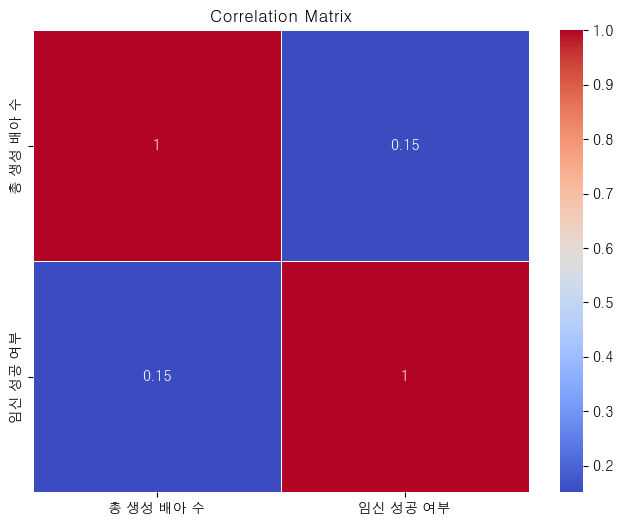

In [161]:
# 상관계수 계산
correlation_matrix = df[['총 생성 배아 수', '임신 성공 여부']].corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [162]:
summarize_grouped_data(df, ['총 생성 배아 수'])

Grouped by: 총 생성 배아 수

      group  '임신 실패' count     ratio  Total
0   (-1.0,)           5480  0.871086   6291
1    (0.0,)          44180  0.828132  53349
2    (1.0,)          13779  0.905144  15223
3    (2.0,)          15734  0.819906  19190
4    (3.0,)          15884  0.758114  20952
5    (4.0,)          15619  0.722700  21612
6    (5.0,)          14176  0.694561  20410
7    (6.0,)          12608  0.677012  18623
8    (7.0,)          10606  0.661676  16029
9    (8.0,)           8853  0.650000  13620
10   (9.0,)           7187  0.645674  11131
11  (10.0,)           5798  0.639603   9065
12  (11.0,)           4489  0.633145   7090
13  (12.0,)           3704  0.647552   5720
14  (13.0,)           2739  0.633881   4321
15  (14.0,)           2164  0.644048   3360
16  (15.0,)           1616  0.642289   2516
17  (16.0,)           1251  0.652923   1916
18  (17.0,)           1019  0.677527   1504
19  (18.0,)            778  0.696509   1117
20  (19.0,)            553  0.692115    799
21  (20.0

,group,'임신 실패' count,ratio,Total
0,"(-1.0,)",5480,0.871086,6291
1,"(0.0,)",44180,0.828132,53349
2,"(1.0,)",13779,0.905144,15223
3,"(2.0,)",15734,0.819906,19190
4,"(3.0,)",15884,0.758114,20952
5,"(4.0,)",15619,0.722700,21612
6,"(5.0,)",14176,0.694561,20410
7,"(6.0,)",12608,0.677012,18623
8,"(7.0,)",10606,0.661676,16029
9,"(8.0,)",8853,0.650000,13620


In [ ]:
'총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수'
'저장된 배아 수', '미세주입 후 저장된 배아 수', '해동된 배아 수'

In [165]:
summarize_grouped_data(df, ['이식된 배아 수'])

Grouped by: 이식된 배아 수

    group  '임신 실패' count     ratio   Total
0  (0.0,)          36514  0.999179   36544
1  (1.0,)          64383  0.686452   93791
2  (2.0,)          76362  0.688908  110845
3  (3.0,)           7384  0.831532    8880


,group,'임신 실패' count,ratio,Total
0,"(0.0,)",36514,0.999179,36544
1,"(1.0,)",64383,0.686452,93791
2,"(2.0,)",76362,0.688908,110845
3,"(3.0,)",7384,0.831532,8880
